## Estadística Aplicada

Francisco Humberto Villegas Reyna 1731722 Gpo43

In [1]:
#librerías básicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#librerias especializadas
from lifelines import CoxPHFitter
!pip install seaborn 

In [3]:
import seaborn as sns

In [5]:
from lifelines.datasets import load_rossi
rossi=load_rossi()
rossi.head()

,week,arrest,fin,age,race,wexp,mar,paro,prio
0,20,1,0,27,1,0,0,1,3
1,17,1,0,18,1,0,0,1,8
2,25,1,0,19,0,1,0,1,13
3,52,0,1,23,1,1,1,1,1
4,52,0,0,19,0,1,0,1,3


The data pertain to 432 convicts who were released from Maryland state prisons in the 1970s and who were followed up for one year after release. Half the released convicts were assigned at random to an experimental treatment in which they were given financial aid; half did not receive aid.:

In [7]:
## 1. transformar variables
## 2. verificar que todas las variables seasn numericas
## 3. verificar que no haya valores perdidos
## 4. Estadisticas descriptivas
## 5. Histograma de la variable dependiente

In [9]:
## Transformar variables 
## hoy no es necesario
## verificar que variables sean numericas

rossi.dtypes

## base cumple con ser numerica

week      int64
arrest    int64
fin       int64
age       int64
race      int64
wexp      int64
mar       int64
paro      int64
prio      int64
dtype: object

In [10]:
## verificar que haya missing values 

rossi.isnull().sum()

week      0
arrest    0
fin       0
age       0
race      0
wexp      0
mar       0
paro      0
prio      0
dtype: int64

In [11]:
## estadisticas descriptivas

rossi.describe()

,week,arrest,fin,age,race,wexp,mar,paro,prio
count,432.000000,432.000000,432.00000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000
mean,45.854167,0.263889,0.50000,24.597222,0.877315,0.571759,0.122685,0.618056,2.983796
std,12.662293,0.441251,0.50058,6.113375,0.328456,0.495398,0.328456,0.486426,2.896068
min,1.000000,0.000000,0.00000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50.000000,0.000000,0.00000,20.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,52.000000,0.000000,0.50000,23.000000,1.000000,1.000000,0.000000,1.000000,2.000000
75%,52.000000,1.000000,1.00000,27.000000,1.000000,1.000000,0.000000,1.000000,4.000000
max,52.000000,1.000000,1.00000,44.000000,1.000000,1.000000,1.000000,1.000000,18.000000


(0.0, 40.0)

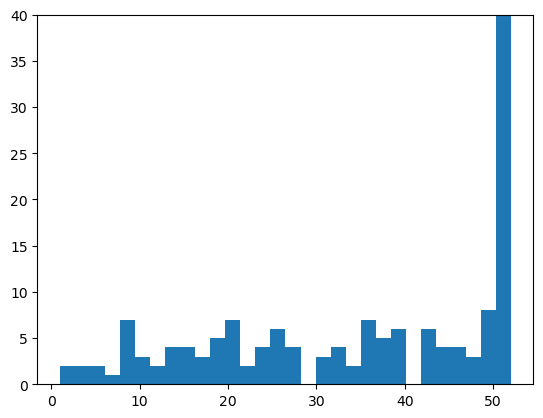

In [14]:
plt.hist(rossi['week'],bins=30)
plt.ylim(0,40)

In [17]:
## estimar el modelo
cph1=CoxPHFitter().fit(rossi,'week','arrest')
cph1.print_summary()

<lifelines.CoxPHFitter: fitted with 432 total observations, 318 right-censored observations>
             duration col = 'week'
                event col = 'arrest'
      baseline estimation = breslow
   number of observations = 432
number of events observed = 114
   partial log-likelihood = -658.75
         time fit was run = 2023-09-14 22:24:59 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
fin        -0.38       0.68       0.19            -0.75            -0.00                 0.47                 1.00
age        -0.06       0.94       0.02            -0.10            -0.01                 0.90                 0.99
race        0.31       1.37       0.31            -0.29             0.92                 0.75                 2.50
wexp       -0.15       0.86       0.21            -0.57             0.27                 0.57                 1.30
mar        -0.43       0.65       0.38            -1.18             0.31                 0.31                 1.37
paro       -0.08       0.92       0.20            -0.47             0.30                 0.63                 1.35
prio        0.09       1.10       0.03             0.04             0.15                 1.04                 1.16

            cmp to     z      p   -log2(p)
covariate                                 
fin           0.00 -1.98   0.05       4.40
age           0.00 -2.61   0.01       6.79
race          0.00  1.02   0.31       1.70
wexp          0.00 -0.71   0.48       1.06
mar           0.00 -1.14   0.26       1.97
paro          0.00 -0.43   0.66       0.59
prio          0.00  3.19 <0.005       9.48
---
Concordance = 0.64
Partial AIC = 1331.50
log-likelihood ratio test = 33.27 on 7 df
-log2(p) of ll-ratio test = 15.37

In [19]:
!pip install jinja2

$H:Bfin=0$

$Pvalue< alpha$
<=Rechazar

No rechazamos H0, la variable "fin" no tiene efecto sobre el riesgo de valor a ser arrestado

age Rechazamos H0; age disminuye el riesgo de ser arrestado

(1-.94)=0.06

Por cada año de edad el riesgo de volver ser arrestado disminuye al 6%

race    No rechazmos, ser negro no tiene efecto sobre el riesgo de volver ser arrestado

wexp, mar, paro: No se rechaza H0 , no tienen efecto en sobr eel riesgo de volver ser arrestado

prio, rechamozs H0; Haber arrestado con anterioridad aumenta el riesgo de volver a ser arrestado , por cada vez que has sido arrestado el riesgo del volver a ser arrestado aumento 10%

(1.1-1)*100=10%